In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader 

In [2]:
#parameters
learning_rate=0.001
batch_size=10
drop_prob=0.3

# Shoaxing dataset Preprocessing

In [3]:
folder_dir = 'c:/Users/JohnKim_PC/Downloads/seminar/seminar/data/denoise/ECGDataDenoised/'

In [4]:
import os
os.getcwd()

'c:\\Users\\JohnKim_PC\\source\\repos\\A2Z_pytorch_tutorial\\Homework'

In [5]:
data_df = pd.read_csv('c:/Users/JohnKim_PC/Downloads/seminar/seminar/data/Diagnostics.csv')
data_df.head()

,FileName,Rhythm,Beat,PatientAge,DateofBirth,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,01-01-1932,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,01-01-1958,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,01-01-1996,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,01-01-1951,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,01-01-1943,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [6]:
#filepath 컬럼에 데이터 경로 저장. 
data_df['Filepath'] = data_df.FileName.apply(lambda x : os.path.join(folder_dir,x+'.csv'))

In [7]:
# Rhythm을 label로 맵핑
label_map_dict = {rhythm:label for label,rhythm in enumerate(sorted(data_df.Rhythm.unique().tolist()))} #series to list > unique > sort >
label_map_dict

{'AF': 0,
 'AFIB': 1,
 'AT': 2,
 'AVNRT': 3,
 'AVRT': 4,
 'SA': 5,
 'SAAWR': 6,
 'SB': 7,
 'SR': 8,
 'ST': 9,
 'SVT': 10}

In [8]:
data_df['label'] = data_df.Rhythm.apply(lambda x : label_map_dict[x])

In [9]:
data_df.head()

,FileName,Rhythm,Beat,PatientAge,DateofBirth,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,Filepath,label
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,01-01-1932,MALE,117,234,114,356,496,81,-27,19,208,265,386,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,1
1,MUSE_20180112_073319_29000,SB,TWC,59,01-01-1958,FEMALE,52,52,92,432,401,76,42,8,215,261,431,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,7
2,MUSE_20180111_165520_97000,SA,NONE,20,01-01-1996,FEMALE,67,67,82,382,403,88,20,11,224,265,415,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,5
3,MUSE_20180113_121940_44000,SB,NONE,66,01-01-1951,MALE,53,53,96,456,427,34,3,9,219,267,447,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,7
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,01-01-1943,FEMALE,162,162,114,252,413,68,-40,26,228,285,354,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,0


In [13]:
data_df.columns

Index(['FileName', 'Rhythm', 'Beat', 'PatientAge', 'DateofBirth', 'Gender',
       'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval',
       'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset',
       'TOffset', 'Filepath', 'label'],
      dtype='object')

## data preprocessing
- Gender column 을 one-hot vector로 만들기
- Female, Male column이 추가적으로 생기는 것
- Gender column은 제거
- pandas get_dummies 사용하여 one-hot vector로 만들기. # 사실 여기선 0,1로만 바꾸면 되지만 Categorical 변수의 속성이 3가지 이상일 경우 위 방법을 사용하여야 함

In [10]:
#gender_onehot = ??
gender_onehot=pd.get_dummies(data_df["Gender"])
type(gender_onehot)

pandas.core.frame.DataFrame

In [11]:
data_df.head()

,FileName,Rhythm,Beat,PatientAge,DateofBirth,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,Filepath,label
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,01-01-1932,MALE,117,234,114,356,496,81,-27,19,208,265,386,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,1
1,MUSE_20180112_073319_29000,SB,TWC,59,01-01-1958,FEMALE,52,52,92,432,401,76,42,8,215,261,431,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,7
2,MUSE_20180111_165520_97000,SA,NONE,20,01-01-1996,FEMALE,67,67,82,382,403,88,20,11,224,265,415,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,5
3,MUSE_20180113_121940_44000,SB,NONE,66,01-01-1951,MALE,53,53,96,456,427,34,3,9,219,267,447,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,7
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,01-01-1943,FEMALE,162,162,114,252,413,68,-40,26,228,285,354,c:/Users/JohnKim_PC/Downloads/seminar/seminar/...,0


In [12]:
data_df = pd.concat([data_df.drop('Gender',axis=1),gender_onehot],axis=1)

## Train and Test dataset 나누기
- sklearn의 train_test_split을 이용권장
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Train : Test = 8 : 2
- train 과 test에 label의 분포가 불균형하게 들어가지 않도록 나누기 (hint : stratify)
- 두 그룹의 label histogram 확인

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df,test_df = train_test_split(data_df,test_size=0.2, train_size=0.8, stratify=data_df["label"])

<AxesSubplot:>

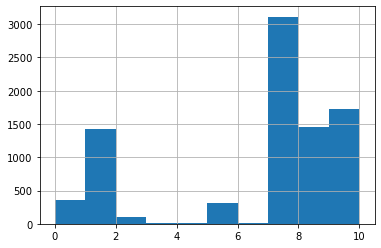

In [15]:
train_df.label.hist()

<AxesSubplot:>

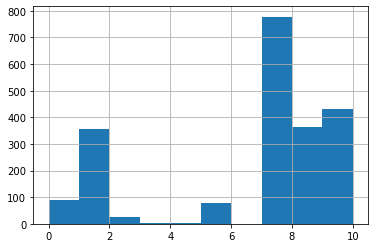

In [16]:
test_df.label.hist()

# Dataset
- biosignal dataset을 정의하고 만들기
- 요구사항
    - __getitem__ : 본 함수에서  filepath을 통해 읽어오도록 만들기
    - 데이터 중에서 'PatientAge', 'Female','Male',
       'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval',
       'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset',
       'TOffset'와 Label을 반환하도록 만들기
    - 반환되는 데이터의 형은 value는 float, label 은 long()
    - 읽어오는 중에 오류가 있을 때, 이에 대한 적절한 오류처리 함께 고안하기 "Try and Except"
    - 읽어오는 중에 데이터 안에 NaN 값이 있다면 오류 처리 하기 - python 의 assertion 활용 추천
    - https://wikidocs.net/21050

In [17]:
class biosignal_dataset(Dataset):
    def __init__(self,data_df):
      
        self.file_values = data_df[[ 'PatientAge', 'FEMALE','MALE', 'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset']].values
        self.label_list= data_df["label"].values
        self.exist_item = None
        self.error_filepath = list() # we can check error file list later
        
    def __len__(self):
        return len(self.label_list)
        
    def __getitem__(self,idx):
        
        try:
            values = self.file_values[idx]
            label = self.label_list[idx]
            # 해당 조건에 부합하지 않으면 assertion error Nan
            value_null=np.isnan(values).sum()
            label_null=np.isnan(label).sum()
            all_null= value_null + label_null

            assert all_null ==0, "nan 존재"
            self.exist_item = idx #this is for alternative idx when going into except clause
        
        except AssertionError :  # always write exact error name
            print('error idx:',idx)
            self.error_filepath.append(idx)
            
            values = self.file_values[self.exist_item]
            label = self.label_list[self.exist_item]
            
        values = torch.from_numpy(values).float()
        label = torch.tensor(label).long()
            
        
        return values,label

In [32]:
a= np.array([0,0,2,3,4])
b=np.array([0,0,1,1,1])
c=a/b
np.isnan(c).sum()

2

# Data 확인

In [18]:
tr_dataset = biosignal_dataset(train_df)
te_dataset = biosignal_dataset(test_df)

#tr_dataloader = DataLoader(??)
#te_dataloader = DataLoader(??)-
tr_dataloader = DataLoader(dataset=tr_dataset,
                           batch_size=batch_size,  #batch_size는 맨 위[2]에 (#parameters) 에서 지정 
                           shuffle=True,
                           drop_last=True)

te_dataloader = DataLoader(dataset=te_dataset,
                           #batch_size=batch_size,  #batch_size는 맨 위[2]에 (#parameters) 에서 지정 
                           shuffle=False,
                           drop_last=False)                       


In [36]:
data,label=te_dataset[1]

In [37]:
print(data,label)


tensor([ 70.,   1.,   0.,  57.,  57.,  84., 442., 430.,  54., -84.,   9., 224.,
        266., 445.]) tensor(7)


# Softmas Regression model 만들기
- linear(2개 이상) /activation /Batch norm / Dropout layer 반드시 포함
- weight initialization은 구현해놓았음
- nn.Sequential 사용하기

In [42]:
#input_size, output_size 설정
#input_size=len(tr_dataset[1][0]) / hidden_size= input_size//2 / output_size =len(set(tr_dataset.label_list))
input_size=14
hidden_size=7
output_size = 11
# nn_layers
linear1= torch.nn.Linear(input_size, hidden_size, bias=True)
linear2= torch.nn.Linear(hidden_size, hidden_size, bias=True)
linear3= torch.nn.Linear(hidden_size, output_size, bias=True)
relu = torch.nn.ReLU()
bn1= torch.nn.BatchNorm1d(hidden_size)
dropout= torch.nn.Dropout(p=drop_prob) #[2] parameters에서 명시 

In [43]:
  class Softmax_regression(nn.Module):
    def __init__(self,input_size,output_size,drop_rate=drop_prob):
        super().__init__()
        self.linear= nn.Sequential(linear1, bn1, relu, dropout,
                                   linear2, bn1, relu, dropout,
                                   linear3).to(device)  
    
    def forward(self,x):
        
        return self.linear(x)
    


In [44]:
#이건 모델 초기화 할 때 이렇게 씁니다. 
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

# 모델 학습하기
- Optimizer, Loss 선언하기
- learning rate는 어느 정도가 적절? 
- train module, test module 따로 만들기

In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [46]:
model = Softmax_regression(train_df, input_size, output_size).to(device)
model.apply(init_weights) #이런 식으로 사용합니다. 

Softmax_regression(
  (linear): Sequential(
    (0): Linear(in_features=14, out_features=7, bias=True)
    (1): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=7, out_features=7, bias=True)
    (5): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=7, out_features=11, bias=True)
  )
)

In [ ]:
model()

In [47]:
#define cost/ loss $ optimizer 
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_f =torch.nn.CrossEntropyLoss().to(device)

In [48]:
epochs = 100 

## train module
- 한 에폭의 훈련을 했을 때 훈련 뒤 loss가 출력되도록 작성

In [52]:
def train_model(model,optim,loss_f,tr_dataloader,device):
    model.train() # 중요
    loss_list = list()
    for data,label in tr_dataloader:
        data, label = data.to(device),label.to(device)

        optim.zero_grad()
        prediction=model(data)
        loss = loss_f(prediction, label)
        loss.backward()
        optim.step()

        loss_list.append(loss.item())
        
    print('train loss : ',np.mean(loss_list))
        
        

## test modules
- Multiple label 일 경우 성능 평가를 어떻게 보여주는가? -> 단순 Accuracy는 어떤 정보도 개선 방향도 제시해주지 못함
- Sklearn의 Classfication report를 활용하여 test 결과 보여주기
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [55]:
from sklearn.metrics import classification_report

def test_model(model,te_dataloader,device):
    model.eval() # 중요
    output_list = list()
    label_list = list()
    
    with torch.no_grad(): # 중요
        for data,label in te_dataloader:
            data, label = data.to(device),label.to(device)

            output = model(data)
            prediction = torch.argmax(output, 1)
            #torch -> np.array로 변환 
            print(prediction)
            output_list.extend
              bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()
    
    print(classification_report(prediction, label))

In [75]:
a= torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
#torch.max(a,dim=1)
#torch.argmax(a,1)
b=[[4,5,6,7],[8,9,7,6]]
c=a.numpy().tolist()
d=list()
d.append'c)
#type(a.numpy().tolist())

SyntaxError: EOL while scanning string literal (<ipython-input-75-289dc514009a>, line 7)

## Train and test model
결과적으로 이 코드가 돌아가야 합니다. 

In [54]:
for epoch in range(epochs):
    train_model(model,optim,loss_f,tr_dataloader,device)
    test_model(model,te_dataloader,device)

train loss :  1.8824832781221275


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets